# Imporing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gold_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
    1. Positive Correlation
    2. Negative Correlation

In [9]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

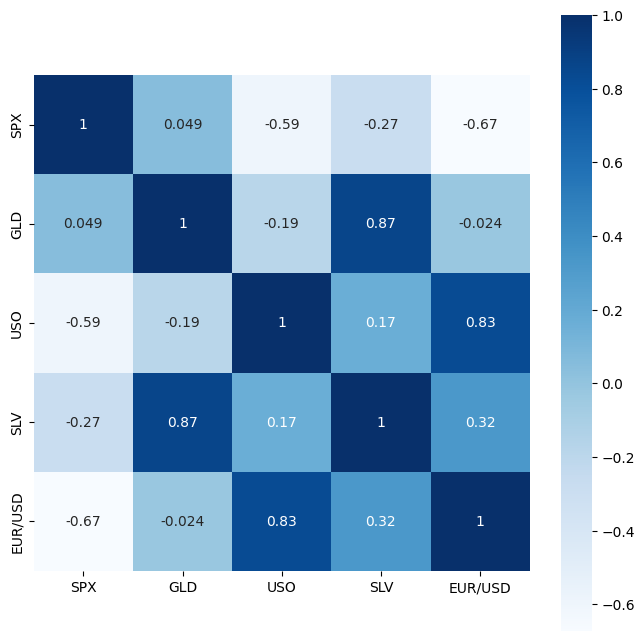

In [10]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True,cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [12]:
gold_data = gold_data.drop(['SPX','EUR/USD'],axis=1)

In [13]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2290 non-null   object 
 1   GLD     2290 non-null   float64
 2   USO     2290 non-null   float64
 3   SLV     2290 non-null   float64
dtypes: float64(3), object(1)
memory usage: 71.7+ KB


Splitting the features and Target

In [14]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

            USO      SLV
0     78.470001  15.1800
1     78.370003  15.2850
2     77.309998  15.1670
3     75.500000  15.0530
4     76.059998  15.5900
...         ...      ...
2285  14.060000  15.5100
2286  14.370000  15.5300
2287  14.410000  15.7400
2288  14.380000  15.5600
2289  14.405800  15.4542

[2290 rows x 2 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [18]:
print(X_train.shape)
print(Y_train.shape)

(1603, 2)
(1603,)


In [19]:
print(X_test.shape)
print(Y_test.shape)

(687, 2)
(687,)


Model Training:
Random Forest Regressor

In [20]:
model = RandomForestRegressor(n_estimators=100)

In [21]:
# training the model 
model.fit(X_train, Y_train)

RandomForestRegressor()

Model evaluation

In [22]:
# prediction on test data
Y_pred = model.predict(X_test)

In [23]:
print(Y_pred)

[127.41379894 118.41040025 139.57790031 122.35790046  94.61320089
 151.54489922 118.43230096 113.26080112 134.54059994 105.60670036
 103.35569862 117.68749738  92.50799924 150.02640198 120.2482996
 116.31820172  86.33699807  92.22260008  93.46439958 127.01049948
  85.66209898 116.50830003 126.9316     172.0874961  171.16539683
 146.77180032 114.75499943 159.21269989 131.4697997  117.68230132
 117.84210049 104.98110239 126.98829987 121.41659893 101.92579934
 119.39010068  83.28880087 115.2116004  126.15989885 139.85739898
 108.7893011  133.29889857 108.5080992  141.21400377 141.78590001
 150.29260088 119.12450054 158.97230215 162.32500271 126.84790007
 124.31669982 109.16429984 122.63400078 117.79269945 154.29969963
 122.06630003 111.98659971  86.59809941 154.29939997 119.06340028
  88.06019895 114.79900005  83.82659994 146.9135992  125.78679818
 127.58440067 125.07060006 119.79030101 155.23819849 117.84109824
 125.34870076 172.76719643 121.78679993 152.38999843 119.33119911
 127.912499

In [24]:
# R squared error
error_score = metrics.r2_score(Y_test,Y_pred)
print('R squared error:',error_score)
print('MSE : ',mean_squared_error(Y_test, Y_pred))
print('RMSE : ',mean_squared_error(Y_test, Y_pred,squared=False))

R squared error: 0.9656759413633342
MSE :  18.32562223284539
RMSE :  4.280843635645361


Compare the actual values and predicted values in a plot

In [25]:
Y_test = list(Y_test)

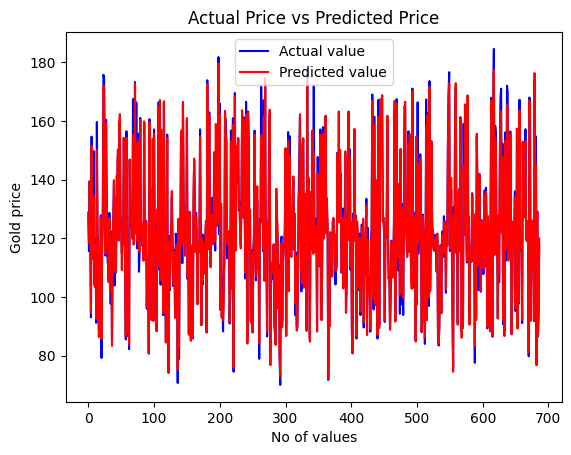

In [26]:
plt.plot(Y_test, color = 'blue', label = 'Actual value')
plt.plot(Y_pred, color = 'red', label = 'Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()